# Регрессионный анализ
Выполнил студент гр.1375 Нарыжный Даниил. Вариант №18

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
$Линейная\;регрессионная\;модель:$<br>
${\mathbb{E}}_\theta\left(Y\vert z\right)=x\left(z\right)^T\beta$<br>
$Статистическая\;модель$<br>
${\mathbb{E}}_\theta\left(Y\vert z\right)=x^T\beta$<br>
$Var_\theta\varepsilon=\sigma^2E$<br>
$Метод\;наименьших\;квадратов:$<br>
$RSS\left(\beta\right)=\left|\left|Y-X^T\beta\right|\right|=\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\rightarrow min$<br>
$XX^T\beta=XY$<br>
$Решение\;системы:$<br>
$\widehat B=\left(XX^T\right)^{-1}XY$<br>
$Доверительное\;оценивание:$<br>
$Доверительный\;интервал\;уровня\;доверия\;1-\alpha:$<br>
$\left[\widehat\psi-x_\alpha s\sqrt b;\widehat\psi+x_\alpha s\sqrt b\right]\ni\psi$<br>
$\chi_\alpha:S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2$<br>
$Доверительный\;интервал\;эллипса\;уровня\;доверия\;1-\alpha$<br>
$A_\alpha=\left\{\overrightarrow x:\left(\overrightarrow x-\widehat\psi\right)^Тb^{-1}\left(\overrightarrow x-\widehat\psi\right)\leq qS^2x_\alpha\right\}$<br>
$где\;x_\alpha:F_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>
$Статистика\;Колмогорова:$<br>
$D_n=sup_{x\in\mathbb{R}}\left|F_n\left(x\right)-F_0\left(x\right)\right|$<br>

$P_{F_0}\left(\sqrt nD_n<x\right)\rightarrow K\left(x\right),\mathbb{R}\left(x\right)$<br>
$где\;K\;\;распределение\;Колмогорова$<br>
$Критерий:$<br>
$\widehat{\varphi\left(\overrightarrow x\right)}=\left\{\begin{array}{l}0,\widehat{D_n}<x_\alpha\\1,\widehat{D_n}\geq x_\alpha\end{array}\right.$<br>
$Теорема\;Колмогорова:$<br>
$\sqrt nD_n\rightarrow K$<br>
$ДНО\;функция\;\psi=C^T\beta,\;где\;C=\left(C_1,C_2..C_m\right)^T$<br>
$Формула\;F\;статистики$<br>
$\;F=\frac{\widehat\psi^T\left(\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\right)\widehat\psi}{qS^2}\sim F_{q,n-r}$<br>
$C^T=\left(0 1\right)$<br>
$\psi=\begin{pmatrix}0&1\end{pmatrix}\times\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}=\beta_1$<br>
$Квантиль$<br>
$\operatorname{𝑥}_\alpha:F_{q,n-r}\left(\operatorname{𝑥}_\alpha\right)=1-\alpha$<br>
$Оценка\;параметра\;S^2:$<br>
$S^2=\frac{RSS\left(\widehat\beta\right)}{\left(n-r\right)}$<br>
$где\;\widehat\beta\;-\;мнк\;оценка\;параметра$ <br>
$S^2=\frac1{\left(n-r\right)}\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)$<br>

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной Х. Построить МНК оценки параметров сдвига B_0 и масшаба B_1. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки**

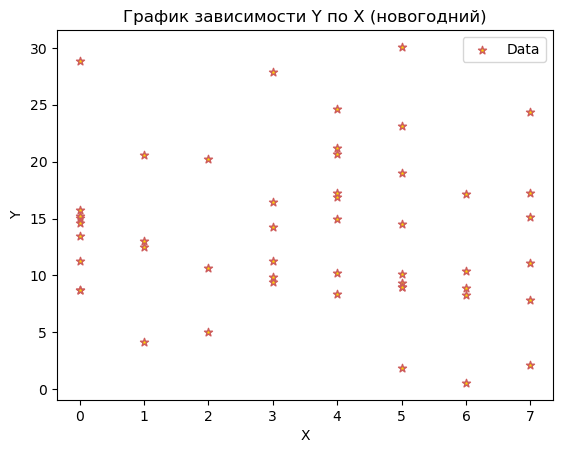

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#viborka
x: list = [7, 1, 1, 3, 5, 2, 7, 0, 2, 0, 0, 3, 0, 6, 0, 4, 0, 4, 7, 1, 3, 4, 1, 4, 7, 3, 5, 6, 5, 3, 0, 5, 6, 4, 0, 5, 2, 5, 7, 5, 0, 5, 5, 4, 7, 6, 4, 3, 4, 6]
y: list = [2.17, 12.99, 12.51, 9.43, 9.36, 10.63, 15.14, 8.68, 5.05, 15.78, 13.47, 27.91, 15.02, 10.36, 8.75, 21.16, 28.80, 24.63, 7.85, 20.56, 9.86, 16.88, 4.15, 8.35, 24.33, 14.25, 10.15, 0.56, 23.16, 16.49, 11.29, 8.99, 8.27, 10.20, 14.65, 30.08, 20.19, 1.83, 11.10, 19.00, 15.21, 8.98, 14.54, 20.63, 17.27, 8.92, 17.26, 11.29, 14.95, 17.17]
def ScatterPlot(x: list, y:list)->None:
    """
    Функция для построения графика зависимости (новогодний!)
    праздник к нам приходит...
    """
    plt.scatter(x, y, marker='*', color='#FFD700', edgecolor='#CD5C5C', label='Data')
    plt.title("График зависимости Y по Х (новогодний)")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
ScatterPlot(x,y)

$Альтернативная\;форма\;лин.регрессионной\;модели:$<br>

$Y=x^T\beta+\varepsilon,\;Var_\theta\varepsilon=\sigma^2E$<br>

$Метод\;наименьших\;квадратов:$<br>

$RSS\left(\beta\right)=\left|\left|Y-Y^T\beta\right|\right|^2=\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\rightarrow min$<br>

$Нормальные\;уравнения:$<br>

$XX^T\beta=XY$<br>

$Решение\;системы:$<br>

$\widehat B=\left(XX^T\right)^{-1}XY$<br>

$полученные\;МНК-оценки$<br>

$\widehat\beta=\begin{pmatrix}14.727\\-0.260\end{pmatrix}$<br>


x
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [7. 1. 1. 3. 5. 2. 7. 0. 2. 0. 0. 3. 0. 6. 0. 4. 0. 4. 7. 1. 3. 4. 1. 4.
  7. 3. 5. 6. 5. 3. 0. 5. 6. 4. 0. 5. 2. 5. 7. 5. 0. 5. 5. 4. 7. 6. 4. 3.
  4. 6.]]

XX_T
 [[ 50. 177.]
 [177. 897.]]
beta
 [14.72730863 -0.26053916]



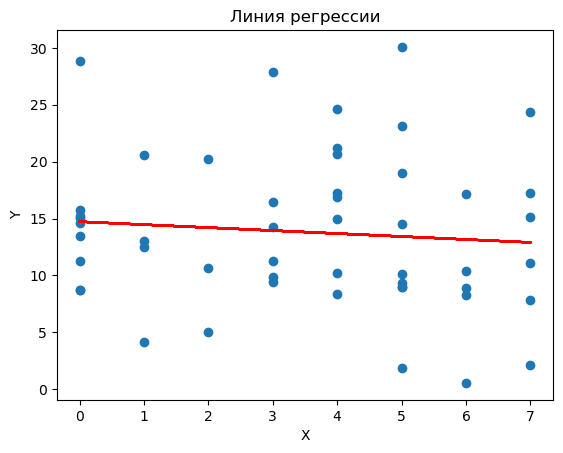

In [117]:
import numpy as np
def ScatterPlot(x: list, y:list)->None:
    plt.scatter(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')

def LinearRegression(x: list,y:list)->float:
    """
    Для построения регресионной модели переменной Y по Х
    """
    n:int = len(x)
    X = np.array([np.ones(n),x])
    print(f"x\n {X}\n")
    X_T = np.transpose(X)
    XX_T = np.dot(X,X_T)
    print("XX_T\n",XX_T)
    XX_T_inverted = np.linalg.inv(XX_T)
    B = np.dot(np.dot(XX_T_inverted,X),y)
    print(f"beta\n {B}\n")
    ScatterPlot(x,y)
    yr = B[0]+B[1]*np.array(x)
    plt.plot(np.array(x),yr,color="red")
    plt.title("Линия регрессии")
    plt.show()
    return B,X,XX_T
beta,X,XX_T = LinearRegression(x,y)



Анализируя полученый график, можно заметить отклонение между построенной линией регресиии и полученным результатом

**2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h=2.40. Проверить гипотезу нормальности ошибок на уровне значимости alpha=0.02  по chi^2 (x). Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Bизуально оценить данный факт**

$Оценка\;параметра\;S^2:$<br>
$S^2=\frac{RSS\left(\widehat\beta\right)}{\left(n-r\right)}$<br>
$где\;\widehat\beta\;-\;мнк\;оценка\;параметра$ <br>
$S^2=\frac1{\left(n-r\right)}\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\approx46.478$<br>
$r=2$<br>

Дисперсия: 46.47801173729754


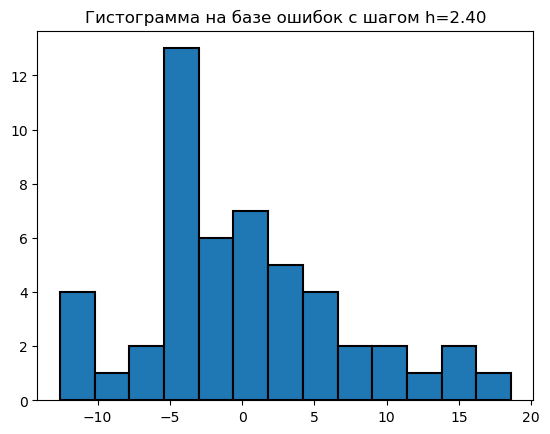

Интервал 1 (-12.60; -10.20):4 чисел
Интервал 2 (-10.20; -7.80):1 чисел
Интервал 3 (-7.80; -5.40):2 чисел
Интервал 4 (-5.40; -3.00):13 чисел
Интервал 5 (-3.00; -0.60):6 чисел
Интервал 6 (-0.60; 1.80):7 чисел
Интервал 7 (1.80; 4.20):5 чисел
Интервал 8 (4.20; 6.60):4 чисел
Интервал 9 (6.60; 9.00):2 чисел
Интервал 10 (9.00; 11.40):2 чисел
Интервал 11 (11.40; 13.80):1 чисел
Интервал 12 (13.80; 16.20):2 чисел
Интервал 13 (16.20; 18.60):1 чисел
[-12.60407366 -10.20407366  -7.80407366  -5.40407366  -3.00407366
  -0.60407366   1.79592634   4.19592634   6.59592634   8.99592634
  11.39592634  13.79592634  16.19592634  18.59592634]


In [118]:
def Calc_dispersia(x:list,X:np.array,Y:list,beta:float)->float:
    """
    Подсчет дисперсии
    """
    XB = np.dot(X.T,beta)
    mistake = (Y- XB)
    r = 2
    n = len(x)
    S_2 =np.dot(np.transpose(mistake),mistake)/(n-r)
    print(f"Дисперсия: {S_2}")
    hystogram_based_on_mistakes(mistake)
    return S_2,mistake

def hystogram_based_on_mistakes(mistakes):
    """
    Функция для построения графика на базе ошибок, шаг 
    h=2.4
    """
    h = 2.4
    bins = np.arange(min(mistakes), max(mistakes) + h, h)
    histogram, bin_edges = np.histogram(mistakes, bins=bins)

    plt.hist(mistakes, bins=bins,edgecolor='black',linewidth=1.5)
    plt.title("Гистограмма на базе ошибок с шагом h=2.40")
    plt.show()

    for i in range(len(histogram)):
        print(f"Интервал {i+1} ({bin_edges[i]:.2f}; {bin_edges[i+1]:.2f}):{histogram[i]} чисел")
    plt.show()
    print(bin_edges)

S_2,mistake = Calc_dispersia(x,X,y,beta)

Cледует заметить, что несмещенная оценка дисперсии предоставляет информациюю о разбросе данных. Если значение дисперсии велико, то и разброс также будет больше. Если дисперсия мала, то это означает, что большинство значений выборки близки к среднему. B данной работе дисперсия приблизительно равна 46.478, что говорит о разбросе значений в выборке относительного среднего.

$Проверка\;гипотезы\;нормальности\;ошибок\;на\;уровне\;значимости\;\alpha=0.02\;по\;\chi^2$<br>

$Объединяем\;интервалы\;таким\;образом,\;чтобы\;в\;каждом\;было\;5\;и\;более\;элементов$<br>
$I_1=(-\infty;-5.40\rbrack;\\n_1=7$<br>
$I_2=(-5.40;-3.00\rbrack;\\n_2=13$<br>
$I_3=(-3.00;-0.60\rbrack;\\n_3=6$<br>
$I_4=(-0.60;1.80\rbrack;\\n_4=7$<br>
$I_5=(1.80;4.20\rbrack;\\n_5=5$<br>
$I_6=(4.20;9.00\rbrack;\\n_6=6$<br>
$I_7=\left(9.00;+\infty\right);\\n_7=6$<br>

In [119]:
from math import sqrt
from scipy import stats as sts
def HypothesisCheck(intervals:list,n_element:list,sigma:float,alpha:float):
    """
    Функция для проверки гипотезы нормальности ошибок.
    """
    alpha0:int = 0
    res:list = []
    n: int =  50
    for i in range(1,len(intervals)):
        res.append(sts.norm.cdf(intervals[i],alpha0,sigma)-sts.norm.cdf(intervals[i-1],alpha0,sigma))
    res.insert(0,sts.norm.cdf(intervals[0],alpha,sigma))
    res.append(1-sts.norm.cdf(intervals[-1],alpha,sigma))
    for i in range(len(res)):
        print(f"P{i}: {res[i]}",sep=" ")
        
    chi_observed:float = sum([(n_element[i]-n*res[i])**2/(n*res[i]) for i in range(len(n_element))])
    print("Полученный хи^2", chi_observed)
    chi_from_func: float = sts.chi2.ppf(1-alpha,len(res)-1) 
    print(f'Хи^2 при уровне значимости {alpha} = {chi_from_func}')
    if chi_from_func>chi_observed:
        print("Нет оснований отвергнуть гипотезу")
    else:
        print(f"По критерию Пирсона гипотеза отвергается, т.к. {chi_from_func}<{chi_observed}")
    print(f"Наибольшее значение уровня, при котором нет оснований отвергать гипотезу={1-sts.chi2.cdf(chi_observed,len(res)-1)}")

#список для интервалов и количества элементов в этих интервалах.
l_intervals: list = [-5.40,-3,-0.6,1.8,4.20,9]
n_elements: list = [7,13,6,7,5,6,6]
count_of_intervals = len(l_intervals)
n:int = 50
a: float = 0.02
sigma: float = sqrt(S_2)
HypothesisCheck(l_intervals,n_elements, sigma,a)

P0: 0.21330228556650782
P1: 0.11579559861251854
P2: 0.13498261637653325
P3: 0.1391858054830562
P4: 0.12695317848763232
P5: 0.17553151132306277
P6: 0.0938853680600582
Полученный хи^2 11.849784085303979
Хи^2 при уровне значимости 0.02 = 15.033207751218962
Нет оснований отвергнуть гипотезу
Наибольшее значение уровня, при котором нет оснований отвергать гипотезу=0.06540507069098245


$Статистика\;Колмогорова:$<br>
$D_n=sup_{x\in\mathbb{R}}\left|F_n\left(x\right)-F_0\left(x\right)\right|$<br>
$Критерий:$<br>
$\widehat{\varphi\left(\overrightarrow x\right)}=\left\{\begin{array}{l}0,\widehat{D_n}<x_\alpha\\1,\widehat{D_n}\geq x_\alpha\end{array}\right.$<br>
$Теорема\;Колмогорова:$<br>
$\sqrt nD_n\rightarrow K$<br>

Cтатистика критерия Колмогорова: 0.82
 sqrt(n)*D_n:5.79827560572969
 Ks_p_value: 3.770852330233186e-17
 Квантиль x_a: K(x_a)=1-alpha=1.5174269646320033

Гипотеза отвергается


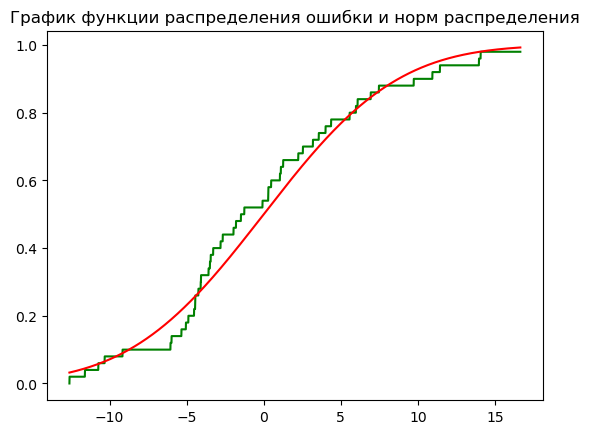

In [120]:
from scipy.stats import kstest,  norm,kstwobign
import numpy as np
from numpy import sqrt

def KolmogorovCriteria(data:list,cdf:any,n:int,alpha:float)->None:
    """
    Для критерия Колмогорова и проверки гипотезы
    """
    ks_statistics,ks_p_value = kstest(data,cdf)

    kvantil:float = kstwobign.ppf(1-alpha)
    temp:float = sqrt(n)*ks_statistics

    print(f"Cтатистика критерия Колмогорова: {ks_statistics}\n",
          f"sqrt(n)*D_n:{temp}\n",
          f"Ks_p_value: {ks_p_value}\n",
          f"Квантиль x_a: K(x_a)=1-alpha={kvantil}\n"),
    if temp>kvantil:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований, чтобы отвергнуть гипотезу")

def Cdf_func(data:list,alpha0:int,sigma0:int)->any:
    return norm.cdf(data,loc=alpha0,scale=sigma0)

def FuncBuilder(mistakes:list, n:int,sigma0:float)->None:
    """
    Для построения графика распределения ошибки и нормального распределения
    """
    h = 0.01
    x = (np.arange(min(mistakes), max(mistakes),h))
    y_mistakes: list  = []
    y_nrm_cdf: list = []
        
    for x_value in x:
        temp:int = 0
        for i in range(n):
            if mistakes[i]>=x_value:
                continue
            temp +=1
        y_mistakes.append(temp/n)

    for x_value in x:
        y_nrm_cdf.append(sts.norm.cdf(x_value,0,sigma0))
    
    plt.plot(x,y_mistakes,color="green")
    plt.plot(x,y_nrm_cdf,color="red")
    plt.title("График функции распределения ошибки и норм распределения")
    
alpha:float = 0.02
sigma0:float = sqrt(S_2)
My_cdf = Cdf_func(x,alpha,sigma0)
KolmogorovCriteria(x,My_cdf,n,alpha)
FuncBuilder(mistake,n,sigma0)

Проанализировав полученный график, можно заметить, что довольно сильные отклонения наблюдаются в интервале от -7 до 5 как в нижнюю, так и в верхнюю сторону. И при уровне значимости 1-alpha гипотеза отвергается

**3. B предложении нормальности ошибок построить доверительные интервалы для параметров B_0 и B1 уровня доверия 1-alpha, alpha=0.02. Построить доверительный эллипс уровня доверия 1-alpha для (B_0,B_1) (вычислить его полуоси)**

$ДНО\;функция:$<br>
$\psi=С^Т\beta,C=\left(C_1,...C_n\right)^T$<br>
$Оценка:$<br>
$\widehat\psi=C^T\widehat\beta$<br>
$Элемент\;дисперсии\;оценки:$<br>
$\;b_\psi=C^T\left(XX^T\right)^{-1}C$<br>
$Распределение:$<br>
$\frac{\widehat\psi}{s\sqrt b}\sim S_{n-r}$<br>
$Доверительный\;интервал\;уровня\;доверия\;1-\alpha:$<br>
$\left[\widehat\psi-x_\alpha s\sqrt b;\widehat\psi+x_\alpha s\sqrt b\right]\ni\psi$<br>
$\chi_\alpha:S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2$<br>
$Доверительный\;интервал\;эллипса\;уровня\;доверия\;1-\alpha$<br>
$A_\alpha=\left\{\overrightarrow x:\left(\overrightarrow x-\widehat\psi\right)^Тb^{-1}\left(\overrightarrow x-\widehat\psi\right)\leq qS^2x_\alpha\right\}$<br>
$где\;x_\alpha:F_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>
$Каноническаяя\;формула\;Эллипса\;в\;двумерном\;пространстве:$<br>
$\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$<br>
$формула\;полуосей\;(большой\;полуоси\;и\;малой):$<br>
$a=\sqrt{\frac{C^\ast}{\lambda_1}},b=\sqrt{\frac{C^\ast}{\lambda_2}}$<br>


beta0 14.727308631018413
left_board: 10.50143876787729
right board: 18.953178494159538

beta1 -0.26053916130463745
left_board: -1.2582504804072994
right board: 0.7371721577980246


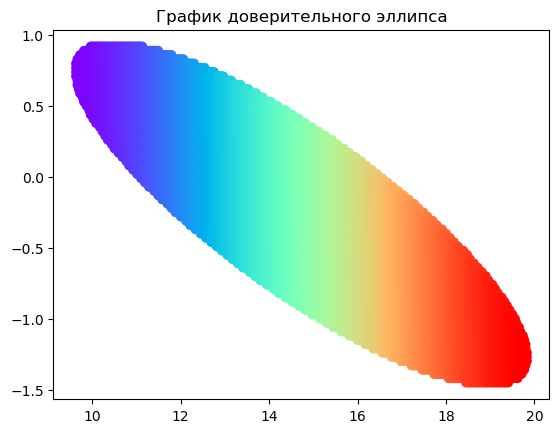

In [121]:
def CalculatePsi(C_0_T:list,C_1_T:list,beta:list)->list:
    """
    Подсчет  Psi для beta0 и beta1
    """
    Psi_0 = np.dot(C_0_T,beta)
    Psi_1 = np.dot(C_1_T,beta)
    return [Psi_0,Psi_1]

def CalculateDpsi(C_0_T:list,C_1_T:list,XX_T:np.array)->list:
    XX_T_inv = np.linalg.inv(XX_T)
    Dpsi_0 = np.dot(np.dot(np.transpose(C_0_T),XX_T_inv),C_0_T)
    Dpsi_1 = np.dot(np.dot(np.transpose(C_1_T),XX_T_inv),C_1_T)
    return [Dpsi_0,Dpsi_1]
def CalculateInterval(Psi:list,alpha:float,n:int,Dpsi:list,S:float)->None:
    """
    Для построения доверительного интервала для beta0, beta1 (левая и правая граница)
    """
    x_alpha:float = sts.t.ppf(1-alpha,n-2)
    left_board_b0 = (Psi[0]-x_alpha*S*sqrt(Dpsi[0]))
    right_board_b0 = (Psi[0]+x_alpha*S*sqrt(Dpsi[0]))
    left_board_b1 = (Psi[1]-x_alpha*S*sqrt(Dpsi[1]))
    right_board_b1 = (Psi[1]+x_alpha*S*sqrt(Dpsi[1]))
    print(f"\nbeta0 {Psi[0]}\nleft_board: {left_board_b0}\nright board: {right_board_b0}")
    print(f"\nbeta1 {Psi[1]}\nleft_board: {left_board_b1}\nright board: {right_board_b1}")

def CalculateEllipseInterval(alpha:float,S_2:float, Psi:list,XX_T:float):
    """
    Для построения доверительного эллипса (подсчет уровня доверия, график)
    """
    x_alpha:float=sts.f.ppf(1-alpha,2,n-2)
    temp: int = 5
    q_S_2_x_a:float = 2*S_2*x_alpha
    ar0,ar1 = [],[]
    h: float = 0.03
    for beta_0 in np.arange(11-temp,19+temp,step=h):
        for beta_1 in np.arange(-2-temp,1+temp,step=h):
            betas:list = [beta_0,beta_1]
            cor_x  =np.array(betas)-np.array(Psi)
            cor_x_T = np.transpose(cor_x)
            if np.dot(np.dot(cor_x_T,XX_T),cor_x)>q_S_2_x_a:
                continue
            ar0.append(beta_0)
            ar1.append(beta_1)
    plt.title("График доверительного эллипса")
    plt.scatter(ar0,ar1, c=np.arange(len(ar0)), cmap='rainbow')
    plt.show()
                
C_0_T: list = [1,0]
C_1_T: list = [0,1]
Psi: list = CalculatePsi(C_0_T,C_1_T,beta)
Dpsi: list = CalculateDpsi(C_0_T,C_1_T,XX_T)
alpha1: float = alpha/2
S = sqrt(S_2)
CalculateInterval(Psi,alpha1,n,Dpsi,S)
CalculateEllipseInterval(alpha,S_2,Psi,XX_T)

$Нахождение\;полуосей\;Эллипса:$<br>
$\left(\overrightarrow x-\widehat\psi\right)b^{-1}\left(\overrightarrow x-\widehat\psi\right)=\left(\begin{pmatrix}b_0\\b_1\end{pmatrix}-\widehat\psi\right)^T\times\begin{pmatrix}50&177\\177&897\end{pmatrix}\times\left(\begin{pmatrix}b_0\\b_1\end{pmatrix}-\widehat\psi\right)$<br>
$=\begin{pmatrix}b_0-14.72730\\b_1+0.260539\end{pmatrix}^T\times\begin{pmatrix}50&177\\177&897\end{pmatrix}\times\left(\begin{pmatrix}b_0-14.72730\\b_1+0.260539\end{pmatrix}\right)$<br>
$Получаем\;следующее\;выражение:$<br>

$Получаем\;следующее\;выражение$<br>
$50\times b_0^2+897\times b_1^2+354\times b_0\times b_1-1380.499\times b_0-4746.057\times b_1+9547.246$<br>
$50\times b_0^2+354\times b_0\times b_1-1380.499\times b_0+897\times b_1^2-4746.057\times b_1+9547.246$<br>
$Поиск\;собственных\;чисел..\;$<br>
$M\;=\;\begin{pmatrix}50&177\\177&897\end{pmatrix}$<br>
$\begin{vmatrix}50-\lambda&177\\177&897-\lambda\end{vmatrix}=0\rightarrow\left(50-\lambda\right)\left(897-\lambda\right)-177^2=44850-50\lambda-897\lambda+\lambda^2-31329$<br>
$=\lambda^2-947\lambda+13521$<br>
$\lambda_1=14.499;\lambda_2=932.500$<br>
$Большая\;и\;малая\;полуось:$<br>
$a=\sqrt{\frac{qS^2x_\alpha}{\lambda_1}},b=\sqrt{\frac{qS^2x_\alpha}{\lambda_2}}$<br>
$a=\sqrt{\frac{2.00\times46.478\times4.248}{14.499}}=5.21$<br>
$b=\sqrt{\frac{2.00\times46.478\times4.248}{932.500}}=0.6507$<br>

**4.Сформулировать гипотезу независимости переменной Y от переменной Х. Провести проверку значимости**

$ДНО\;функция\;\psi=C^T\beta,\;где\;C=\left(C_1,C_2..C_m\right)^T$<br>
$Формула\;F\;статистики$<br>
$\;F=\frac{\widehat\psi^T\left(\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\right)\widehat\psi}{qS^2}\sim F_{q,n-r}$<br>
$C^T=\left(0 1\right)$<br>
$\psi=\begin{pmatrix}0&1\end{pmatrix}\times\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}=\beta_1$<br>
$Квантиль$<br>
$\operatorname{𝑥}_\alpha:F_{q,n-r}\left(\operatorname{𝑥}_\alpha\right)=1-\alpha$<br>

In [122]:
def HypotesisCalc(n:int,x:list,alpha:float,beta:np.array,S_2:float)->None:
    """
    Для Гипотезы независимости переменной Y от Х
    """
    C_T: np.array = np.array([0,1])
    C: np.array = np.transpose(C_T)

    x_alpha:float = (sts.f(1,n-2)).ppf(1-alpha)

    XX_T = np.linalg.inv(np.dot(X, np.transpose(X)))
    C_T_XX_T_C = np.dot(np.dot(C_T,XX_T), C)    
    f = beta[1]**2/(C_T_XX_T_C*1*S_2)
    print(f"F=",f)
    print("x_alpha", x_alpha)
    if x_alpha<f:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований отвергать гипотезу")
a:float = 0.02
print(X)
HypotesisCalc(n,X,a,beta,S_2)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [7. 1. 1. 3. 5. 2. 7. 0. 2. 0. 0. 3. 0. 6. 0. 4. 0. 4. 7. 1. 3. 4. 1. 4.
  7. 3. 5. 6. 5. 3. 0. 5. 6. 4. 0. 5. 2. 5. 7. 5. 0. 5. 5. 4. 7. 6. 4. 3.
  4. 6.]]
F= 0.3949456081183384
x_alpha 5.7916334248808425
Нет оснований отвергать гипотезу


**5. Сформулировать модель, включающую дополнительный член с Х^2. Построить МНК оценки параметров B_0,B_1,B_2 в данной модели. Изобразить графически полученную регрессионную зависимость**

$Альтернативная\;форма\;лин.регрессионной\;модели:$<br>

$Y=x^T\beta+\varepsilon,\;Var_\theta\varepsilon=\sigma^2E$<br>

$Y=\beta_0+\beta_1X+\beta_2X^2$<br>

$Нормальные\;уравнения:$<br>

$XX^T\beta=XY$<br>

$Решение\;системы:$<br>

$\widehat B=\left(XX^T\right)^{-1}XY$<br>

$\widehat B=\begin{pmatrix}13.887\\0.7517\\-0.1529\end{pmatrix}$<br>

[[ 0.09227228 -0.04436379  0.0047255 ]
 [-0.04436379  0.0414135  -0.005699  ]
 [ 0.0047255  -0.005699    0.00086115]]
[13.88792261  0.75176744 -0.15296429]


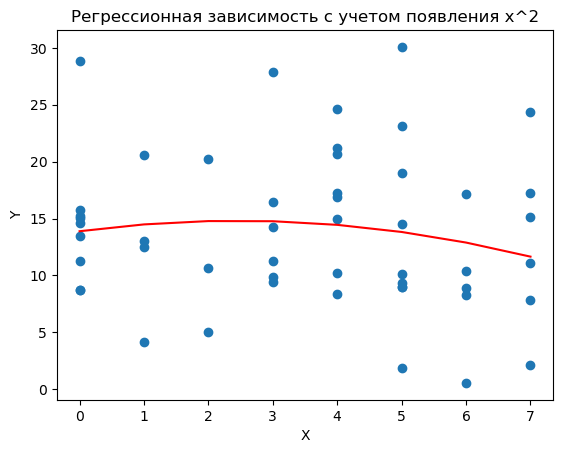

In [123]:
import numpy as np
x: list = [7, 1, 1, 3, 5, 2, 7, 0, 2, 0, 0, 3, 0, 6, 0, 4, 0, 4, 7, 1, 3, 4, 1, 4, 7, 3, 5, 6, 5, 3, 0, 5, 6, 4, 0, 5, 2, 5, 7, 5, 0, 5, 5, 4, 7, 6, 4, 3, 4, 6]
y: list = [2.17, 12.99, 12.51, 9.43, 9.36, 10.63, 15.14, 8.68, 5.05, 15.78, 13.47, 27.91, 15.02, 10.36, 8.75, 21.16, 28.80, 24.63, 7.85, 20.56, 9.86, 16.88, 4.15, 8.35, 24.33, 14.25, 10.15, 0.56, 23.16, 16.49, 11.29, 8.99, 8.27, 10.20, 14.65, 30.08, 20.19, 1.83, 11.10, 19.00, 15.21, 8.98, 14.54, 20.63, 17.27, 8.92, 17.26, 11.29, 14.95, 17.17]

def ScatterPlot(x: list, y:list)->None:
    """
    Для построения графика регресионной зависимости
    """
    plt.scatter(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')

def LinearRegression(x: list,y:list)->float:
    n:int = len(x)
    X = np.array([[1]*50,x,list(map(lambda el: el**2, x))])
    X_T = np.transpose(X)
    XX_T = np.dot(X,X_T)
    XX_T_inverted = np.linalg.inv(XX_T)
    print(XX_T_inverted)
    XX_T_inv_X = np.dot(XX_T_inverted,X)
    B = np.dot(XX_T_inv_X,y)
    print(B)
    ScatterPlot(x,y)
    yr = B[0]+B[1]*np.sort(x)+B[2]*(np.sort(x)**2)
    plt.plot(np.sort(x),yr,color="red")
    plt.title("Регрессионная зависимость с учетом появления х^2")
    plt.show()
    return B,X,XX_T
beta,X, XX_T = LinearRegression(x,y)

**6 Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2**<br>

$S^2=\frac1{\left(n-r\right)}\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)$<br>

46.888801790110826


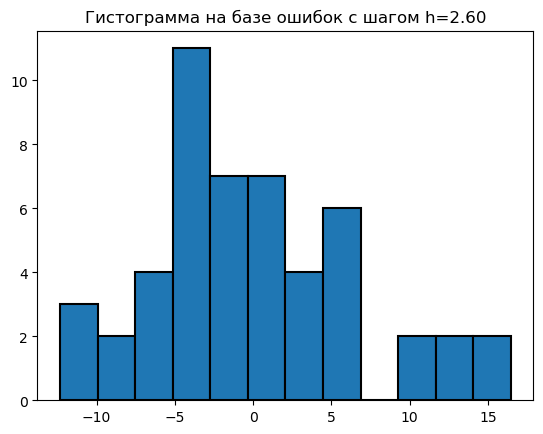

Интервал 1 (-12.33; -9.93):3 чисел
Интервал 2 (-9.93; -7.53):2 чисел
Интервал 3 (-7.53; -5.13):4 чисел
Интервал 4 (-5.13; -2.73):11 чисел
Интервал 5 (-2.73; -0.33):7 чисел
Интервал 6 (-0.33; 2.07):7 чисел
Интервал 7 (2.07; 4.47):4 чисел
Интервал 8 (4.47; 6.87):6 чисел
Интервал 9 (6.87; 9.27):0 чисел
Интервал 10 (9.27; 11.67):2 чисел
Интервал 11 (11.67; 14.07):2 чисел
Интервал 12 (14.07; 16.47):2 чисел
[-12.33181281  -9.93181281  -7.53181281  -5.13181281  -2.73181281
  -0.33181281   2.06818719   4.46818719   6.86818719   9.26818719
  11.66818719  14.06818719  16.46818719]
Дисперсия 46.888801790110826


In [124]:
import numpy as np
x: list = [7, 1, 1, 3, 5, 2, 7, 0, 2, 0, 0, 3, 0, 6, 0, 4, 0, 4, 7, 1, 3, 4, 1, 4, 7, 3, 5, 6, 5, 3, 0, 5, 6, 4, 0, 5, 2, 5, 7, 5, 0, 5, 5, 4, 7, 6, 4, 3, 4, 6]
y: list = [2.17, 12.99, 12.51, 9.43, 9.36, 10.63, 15.14, 8.68, 5.05, 15.78, 13.47, 27.91, 15.02, 10.36, 8.75, 21.16, 28.80, 24.63, 7.85, 20.56, 9.86, 16.88, 4.15, 8.35, 24.33, 14.25, 10.15, 0.56, 23.16, 16.49, 11.29, 8.99, 8.27, 10.20, 14.65, 30.08, 20.19, 1.83, 11.10, 19.00, 15.21, 8.98, 14.54, 20.63, 17.27, 8.92, 17.26, 11.29, 14.95, 17.17]
beta: list = [13.88792261,  0.75176744, -0.15296429]
X = np.array([[1]*50,x,list(map(lambda el: el**2, x))])

def Calc_dispersia(x:list,X:np.array,Y:list,beta:float)->float:
    """
    Подсчет дисперсии
    """
    XB = np.dot(X.T,beta)
    mistake = (Y- XB)
    r = 3 # 3 параметра
    n = len(x)
    S_2 =np.dot(np.transpose(mistake),mistake)/(n-r)
    print(S_2)
    hystogram_based_on_mistakes(mistake)
    return S_2,mistake
def hystogram_based_on_mistakes(mistakes):
    """
    Функция для построения гистограммы на базе ошибок
    """
    h = 2.4
    bins = np.arange(min(mistakes), max(mistakes) + h, h)
    histogram, bin_edges = np.histogram(mistakes, bins=bins)

    plt.hist(mistakes, bins=bins,edgecolor='black',linewidth=1.5)
    plt.title("Гистограмма на базе ошибок с шагом h=2.60")
    plt.show()

    # Вывод количества чисел в каждом интервале
    for i in range(len(histogram)):
        print(f"Интервал {i+1} ({bin_edges[i]:.2f}; {bin_edges[i+1]:.2f}):{histogram[i]} чисел")
    plt.show()
    print(bin_edges)
S_2,mistake = Calc_dispersia(x,X,y,beta)
print("Дисперсия",S_2)

Нужно объединить интервалы так, чтобы в каждом из них было не менее 5 значений.

In [125]:
from math import sqrt
from scipy import stats as sts
def HypothesisCheck(intervals:list,n_element:list,sigma:float,alpha:float):
    """
    """
    alpha0:int = 0
    res:list = []
    n: int =  50
    for i in range(1,len(intervals)):
        res.append(sts.norm.cdf(intervals[i],alpha0,sigma)-sts.norm.cdf(intervals[i-1],alpha0,sigma))
    res.insert(0,sts.norm.cdf(intervals[0],alpha,sigma))
    res.append(1-sts.norm.cdf(intervals[-1],alpha,sigma))
    for i in range(len(res)):
        print(f"P{i}: {res[i]}",sep=" ")
        
    chi_observed:float = sum([(n_element[i]-n*res[i])**2/(n*res[i]) for i in range(len(n_element))])
    print("Полученный хи^2", chi_observed)
    chi_from_func: float = sts.chi2.ppf(1-alpha,len(res)-1) 
    print(f'Хи^2 при уровне значимости {alpha} = {chi_from_func}')
    if chi_from_func>chi_observed:
        print("Нет оснований отвергнуть гипотезу")
    else:
        print(f"По критерию Пирсона гипотеза отвергается, т.к. {chi_from_func}<{chi_observed}")
    print(f"pvalue={sts.chi2.cdf(chi_observed,len(res)-1)}")

l_intervals: list = [-5.13,-2.73,-0.33,2.07,9.27]
n_elements: list = [9,11,7,7,10,6]
count_of_intervals = len(l_intervals)
n:int = 50
a: float = 0.02
sigma: float = sqrt(S_2)
HypothesisCheck(l_intervals,n_elements, sigma,a)

P0: 0.22599698602471685
P1: 0.11818715883929731
P2: 0.13571814205630467
P3: 0.13800626494612783
P4: 0.2933075736518981
P5: 0.08837172476734523
Полученный хи^2 6.911784810193586
Хи^2 при уровне значимости 0.02 = 13.38822259903634
Нет оснований отвергнуть гипотезу
pvalue=0.7727159059321296


$Статистика\;Колмогорова:$<br>
$D_n=sup_{x\in\mathbb{R}}\left|F_n\left(x\right)-F_0\left(x\right)\right|$<br>
$Критерий:$<br>
$\widehat{\varphi\left(\overrightarrow x\right)}=\left\{\begin{array}{l}0,\widehat{D_n}<x_\alpha\\1,\widehat{D_n}\geq x_\alpha\end{array}\right.$<br>
$Теорема\;Колмогорова:$<br>
$\sqrt nD_n\rightarrow K$<br>

Cтатистика критерия Колмогорова: 0.82
 sqrt(n)*D_n:5.79827560572969
 Ks_p_value: 3.770852330233186e-17
 Квантиль x_a: K(x_a)=1-alpha=1.5174269646320033

Гипотеза отвергается


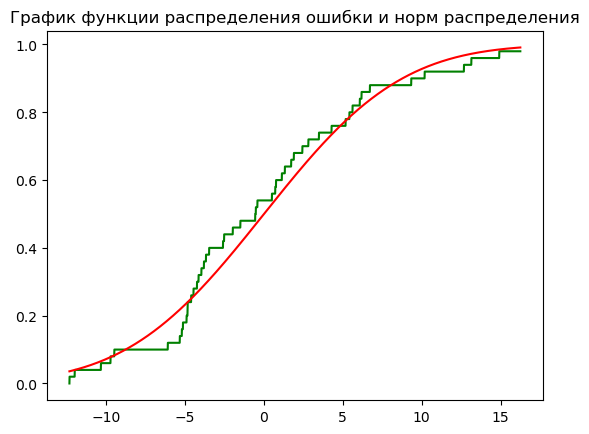

In [126]:
from scipy.stats import kstest,  norm,kstwobign
import numpy as np
from numpy import sqrt

def KolmogorovCriteria(data:list,cdf:any,n:int,alpha:float)->None:
    """
    Для подсчета Колмогорова
    """
    ks_statistics,ks_p_value = kstest(data,cdf)

    kvantil:float = kstwobign.ppf(1-alpha)
    temp:float = sqrt(n)*ks_statistics

    print(f"Cтатистика критерия Колмогорова: {ks_statistics}\n",
          f"sqrt(n)*D_n:{temp}\n",
          f"Ks_p_value: {ks_p_value}\n",
          f"Квантиль x_a: K(x_a)=1-alpha={kvantil}\n"),
    if temp>kvantil:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований, чтобы отвергнуть гипотезу")

def Cdf_func(data:list,alpha0:int,sigma0:int)->any:
    return norm.cdf(data,loc=alpha0,scale=sigma0)


def FuncBuilder(mistakes:list, n:int,sigma0:float)->None:
    """
    Для построения графика
    """
    h = 0.01
    x = (np.arange(min(mistakes), max(mistakes),h))
    y_mistakes: list  = []
    y_nrm_cdf: list = []
        
    for x_value in x:
        temp:int = 0
        for i in range(n):
            if mistakes[i]>=x_value:
                continue
            temp +=1
        y_mistakes.append(temp/n)

    for x_value in x:
        y_nrm_cdf.append(sts.norm.cdf(x_value,0,sigma0))
    
    plt.plot(x,y_mistakes,color="green")
    plt.plot(x,y_nrm_cdf,color="red")
    plt.title("График функции распределения ошибки и норм распределения")
alpha:float = 0.02
sigma0:float = sqrt(S_2)
My_cdf = Cdf_func(x,alpha,sigma0)
KolmogorovCriteria(x,My_cdf,n,alpha)
FuncBuilder(mistake,n,sigma0)

Проанализировав полученный график, можно заметить, что довольно сильные отклонения наблюдаются в интервале от -7 как в нижнюю, так и в верхнюю сторону. И при уровне значимости 1-alpha гипотеза отвергается

**7.B предположении нормальности ошибок построить доверительные интевалы для параметров Beta_0,Beta_1,Beta_2 уровня доверия 1-alpha, alpha=0.02. Написать уравнение доверительного эллипсоида уровня доверия 1-alpha, alpha=0.02**

$ДНО\;функция:$<br>
$\psi=С^Т\beta,C=\left(C_1,...C_n\right)^T$<br>
$Оценка:$<br>
$\widehat\psi=C^T\widehat\beta$<br>
$Элемент\;дисперсии\;оценки:$<br>
$\;b_\psi=C^T\left(XX^T\right)^{-1}C$<br>
$Распределение:$<br>
$\frac{\widehat\psi}{s\sqrt b}\sim S_{n-r}$<br>
$Доверительный\;интервал\;уровня\;доверия\;1-\alpha:$<br>
$\left[\widehat\psi-x_\alpha s\sqrt b;\widehat\psi+x_\alpha s\sqrt b\right]\ni\psi$<br>
$\chi_\alpha:S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2$<br>
$Доверительный\;интервал\;эллипса\;уровня\;доверия\;1-\alpha$<br>
$A_\alpha=\left\{\overrightarrow x:\left(\overrightarrow x-\widehat\psi\right)^Тb^{-1}\left(\overrightarrow x-\widehat\psi\right)\leq qS^2x_\alpha\right\}$<br>
$где\;x_\alpha:F_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>
$Каноническаяя\;формула\;Эллипса\;в\;трехмерном\;пространстве:$<br>
$\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1$<br>
$формула\;полуосей\:$<br>
$a=\sqrt{\frac{C^\ast}{\lambda_1}},b=\sqrt{\frac{C^\ast}{\lambda_2}},c=\sqrt{\frac{C^\ast}{\lambda_3}}$<br>

In [128]:
def CalculatePsi(C_0_T:list,C_1_T:list,C_2_T:list,beta:list)->list:
    """
    Для подсчета Psi
    """
    Psi_0 = np.dot(C_0_T,beta)
    Psi_1 = np.dot(C_1_T,beta)
    Psi_2 = np.dot(C_2_T,beta)
    return [Psi_0,Psi_1,Psi_2]

def CalculateDpsi(C_0_T:list,C_1_T:list,C_2_T:list,XX_T:np.array)->list:
    XX_T_inv = np.linalg.inv(XX_T)
    Dpsi_0 = np.dot(np.dot(np.transpose(C_0_T),XX_T_inv),C_0_T)
    Dpsi_1 = np.dot(np.dot(np.transpose(C_1_T),XX_T_inv),C_1_T)
    Dpsi_2 = np.dot(np.dot(np.transpose(C_2_T),XX_T_inv),C_2_T)
    return [Dpsi_0,Dpsi_1,Dpsi_2]
def CalculateInterval(Psi:list,alpha:float,n:int,Dpsi:list,S:float)->None:
    """
        Для построения доверительного интервала для beta0, beta1, beta2(левая и правая граница)
    """
    x_alpha:float = sts.t.ppf(1-alpha,n-2)
    print(f"x_alpha",x_alpha)
    left_board_b0 = (Psi[0]-x_alpha*S*sqrt(Dpsi[0]))
    right_board_b0 = (Psi[0]+x_alpha*S*sqrt(Dpsi[0]))
    left_board_b1 = (Psi[1]-x_alpha*S*sqrt(Dpsi[1]))
    right_board_b1 = (Psi[1]+x_alpha*S*sqrt(Dpsi[1]))
    left_board_b2 = (Psi[2]-x_alpha*S*sqrt(Dpsi[2]))
    right_board_b2 = (Psi[2]+x_alpha*S*sqrt(Dpsi[2]))
    print(f"beta0 {Psi[0]}\nleft_board: {left_board_b0}\nright board: {right_board_b0}")
    print(f"beta1 {Psi[1]}\nleft_board: {left_board_b1}\nright board: {right_board_b1}")
    print(f"beta1 {Psi[2]}\nleft_board: {left_board_b2}\nright board: {right_board_b2}")
C_0_T: list = [1,0,0]
C_1_T: list = [0,1,0]
C_2_T: list = [0,0,1]
Psi: list = CalculatePsi(C_0_T,C_1_T,C_2_T,beta)
print(Psi)
Dpsi: list = CalculateDpsi(C_0_T,C_1_T,C_2_T,XX_T)
CalculateInterval(Psi,alpha1,n,Dpsi,S)

[13.88792261, 0.75176744, -0.15296429]
x_alpha 2.4065812732756067
beta0 13.88792261
left_board: 8.904130449730758
right board: 18.871714770269243
beta1 0.75176744
left_board: -2.5870700165007907
right board: 4.090604896500791
beta1 -0.15296429
left_board: -0.6344268363971963
right board: 0.32849825639719626


$Нахождение\;полуосей\;Эллипса:$<br>
$\left(\overrightarrow x-\widehat\psi\right)b^{-1}\left(\overrightarrow x-\widehat\psi\right)=\left(\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}-\widehat\psi\right)^T\times\begin{pmatrix}50&177&897\\177&897&4965\\897&4965&29097\end{pmatrix}\times\left(\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}-\widehat\psi\right)$<br>
$=\begin{pmatrix}b_0-13.887922\\b_1-0.751767\\\\b_2+0.152964\end{pmatrix}^T\times\begin{pmatrix}50&177&897\\177&897&4965\\897&4965&29097\end{pmatrix}\times\left(\begin{pmatrix}b_0-13.887922\\b_1-0.751767\\b_2+0.152964\end{pmatrix}\right)$<br>
$Получаем\;следующее\;выражение:$<br>

$50.000\times b_0^2+897\times b_1^2+290297.000\times b_2^2+354.000\times b_0\times b_1+1794.000\times b_0\times b_2-1380.589\times b_0+9930.000\times b_1\times b_2-4746.569\times b_1-23481.411\times b_2+9575.5866$<br>
$50.000\times b_0^2+354.000\times b_0\times b_1+1794.000\times b_0\times b_2-1380.589\times b_0+897\times b_1^2+9930.000\times b_1\times b_2-4746.569\times b_1+29097.000\times b_2^2-23481.411\times b_2+9575.5866$<br>

$Собственные\;числа:$<br>
$M=\begin{pmatrix}50&177&897\\177&897&4965\\897&4965&29097\end{pmatrix}$<br>
$\begin{vmatrix}50-\lambda_1&177&897\\177&897-\lambda_2&4965\\897&4965&29097-\lambda_3\end{vmatrix}=..опускаем\;промежуточные\;вычисления=$<br>
$=\lambda^3-30044\lambda^2+2112546\lambda-15701184$<br>

In [129]:
import numpy as np

def calculate_eigenvalues():
    """
    Функция для подсчета собственных чисел
    """
    coefficients = [1, -30044, 2112546, -15701184]

    eigenvalues = np.roots(coefficients)

    return eigenvalues

eigenvalues_result = calculate_eigenvalues()

print("Собст.числа", eigenvalues_result)


Собст.числа [2.99735371e+04 6.20161437e+01 8.44675017e+00]


$Тогда\;Элипс\;имеет\;следующий\;вид:$<br>
$\frac{\lambda_1}{qS^2x_\alpha}x^2+\frac{\lambda_2}{qS^2x_\alpha}y^2+\frac{\lambda_z}{qS^2x_\alpha}y^2\leq1$<br>

In [130]:
import numpy as np

def calculate_coefficients(q, S_2, x_alpha, Lambda_1, Lambda_2, Lambda_z):
    """
    Функция для подсчета коэффициентов
    """
    coefficient_x = Lambda_1 / (q * S_2 * x_alpha)
    coefficient_y = Lambda_2 / (q * S_2 * x_alpha)
    coefficient_z = Lambda_z / (q * S_2 * x_alpha)
    return coefficient_x, coefficient_y, coefficient_z


q_value = 3 
S_2_value = 46.888801790110826 
x_alpha_value = 4.248907630769176
Lambda_1_value = 2.99735371e+04  
Lambda_2_value = 6.20161437e+01 
Lambda_z_value = 8.44675017e+00  

coeff_x, coeff_y, coeff_z = calculate_coefficients(q_value, S_2_value, x_alpha_value, Lambda_1_value, Lambda_2_value, Lambda_z_value)

print(f"Коэффициенты: coeff_x = {coeff_x}, coeff_y = {coeff_y}, coeff_z = {coeff_z}")


Коэффициенты: coeff_x = 50.14992831762411, coeff_y = 0.10376169988594626, coeff_z = 0.014132596834638486


**8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной Х и проверить её значимость на уровне alpha,alpha=0.02**

$ДНО\;функция\;\psi=C^T\beta,\;где\;C=\left(C_1,C_2..C_m\right)^T$<br>
$Формула\;F\;статистики$<br>
$\;F=\frac{\widehat\psi^T\left(\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\right)\widehat\psi}{qS^2}\sim F_{q,n-r}$<br>
$C^T=\begin{pmatrix}0&0&1\end{pmatrix}$<br>
$\psi=\begin{pmatrix}0&0&1\end{pmatrix}\times\begin{pmatrix}\beta_0\\\beta_1\\\beta_2\end{pmatrix}=\beta_2$<br>
$Квантиль$<br>
$\operatorname{𝑥}_\alpha:F_{q,n-r}\left(\operatorname{𝑥}_\alpha\right)=1-\alpha$<br>

In [131]:
def HypotesisCalc(n:int,x:list,alpha:float,beta:np.array,S_2:float)->None:
    """
    Функция для подсчета гипотезы
    """
    C_T: np.array = np.array([0,0,1])
    C: np.array = np.transpose(C_T)
        
    x_alpha:float = (sts.f(1,n-2)).ppf(1-alpha)

    XX_T = np.linalg.inv(np.dot(X, np.transpose(X)))
    C_T_XX_T_C = np.dot(np.dot(C_T,XX_T), C)    
    f = beta[1]**2/(C_T_XX_T_C*1*S_2)
    print(f"F=",f)
    print("x_alpha", x_alpha)
    if x_alpha<f:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований отвергать гипотезу")
a:float = 0.02
HypotesisCalc(n,X,a,beta,S_2)

F= 13.996565451514547
x_alpha 5.7916334248808425
Гипотеза отвергается


## Выводы


В ходе выполнения практической работы была изучена тема регресионного анализа. Была разобрана тема метода наименьших квадратов для оценки параметров моделей, свойства данного метода, а также была рассмотрена роль МНК в регрессионном анализе.